# Introdução

O **covid-cxr-test** é um projeto que visa identificar pessoas infectatas com a COVID-19 por meio de raio-x do Torax. A natureza do problema não é muito simples, tendo em vista que essa categorização pode variar de pessoa a pessoa. 

Nós propomos uma AI para:
- Identificar pacientes com COVID-19;
- Utilizar processamento de imagem para reconhecer/classificar infectados e não infectados


## Explicação Técnica

- Usamos uma Rede Neural Convolucional (CNN - Convolutional Neural Network)

As convoluções funcionam como filtros que enxergam pequenos quadrados e vão "caminhando" por toda a imagem captando os traços mais marcantes.

Uma convolução multiplica uma matriz de pixels com uma matriz de filtro ou 'kernel' e soma os valores de multiplicação. Em seguida, a convolução desliza para o próximo pixel e repete o mesmo processo até que todos os pixels da imagem tenham sido cobertos. 

<img src="assets/img/convolucoes.png" width="750" title="">


Nós utilizamos os dados **COVIDx CXR-2** disponibilizados no Kaggle para treinar o algoritmo utilizando o Keras.

# Instalando e importando as dependencias

In [1]:
!pip install --upgrade tensorflow keras Pillow matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tf.__version__

'2.5.0'

# Data Preprocessing



In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/train', # directory where the data is located
    labels="inferred", # will organize the data into two labels: 0 = negative, 1 = positive
    label_mode="int", 
    # class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256), # Size to resize images to after they are read from disk 
    shuffle=True, # To suffle the data
   # seed=None, 
    validation_split=None,
    # subset=None,
    interpolation="bilinear",
    follow_links=False,
)
print(dataset.__dict__.keys())
print(dataset._structure)

Found 15951 files belonging to 2 classes.
dict_keys(['_input_dataset', '_batch_size', '_drop_remainder', '_structure', '_variant_tensor_attr', '_self_setattr_tracking', '_self_unconditional_checkpoint_dependencies', '_self_unconditional_dependency_names', '_self_unconditional_deferred_dependencies', '_self_update_uid', '_self_name_based_restores', '_self_saveable_object_factories', '_variant_tracker', '_graph_attr', '_options_attr', 'class_names', 'file_paths'])
(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


# Difference between negative and positive
## Positive
    ##### There is a slightly darker area in the lung and greater opacity.
    
    ## Negative
    #### Lung area slightly lighter, or, when dark, with little opacity

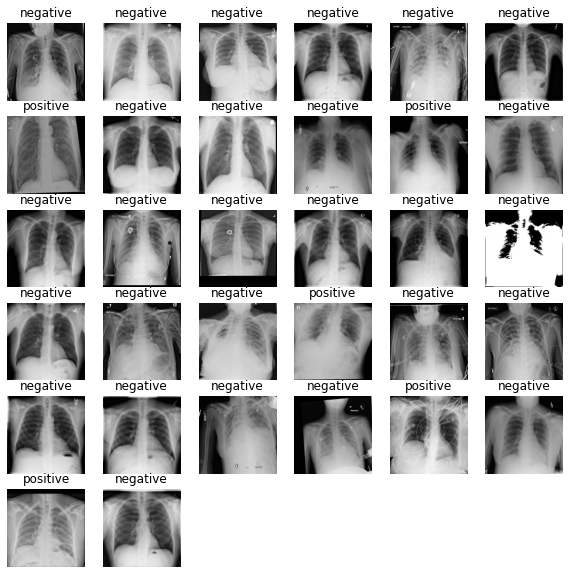

In [10]:
plt.figure(figsize=(10, 10))
class_names = dataset.class_names
for images, labels in dataset.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
#print(training_set.__dict__)


Found 15951 images belonging to 2 classes.


[0 0 0 ... 1 1 1]


/home/joaoegewarth/.virtualenvs/deeplearning/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

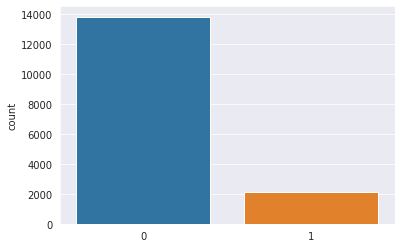

In [18]:
print(training_set.classes)

sns.set_style('darkgrid')
sns.countplot(training_set.classes)

In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 327 images belonging to 2 classes.


####  

/home/joaoegewarth/.virtualenvs/deeplearning/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

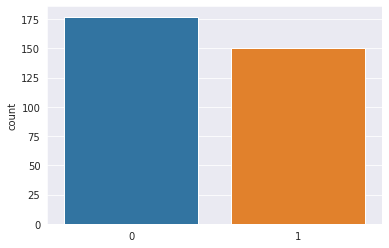

In [20]:
#print(test_set.classes)

sns.set_style('darkgrid')
sns.countplot(test_set.classes)

# Creating and testing models

## Sequential

O tipo do modelo selecionado é o Sequencial, pois permite a criação do modelo passo a passo.


### Funcões de Ativação

Serve para garantir a não linearidade, permitindo que a rede consida aprender qualquer tipo de funcionalidade. Utilizamos a Relu, por ser mais eficiente computacionalmente já que estamos utilizando nossas máquinas pessois para o projeto.

As nossas primeiras Layers são Conv2D. Essas 


### Pooling

Uma camada de pooling serve para simplificar a informação da camada anterior. A unidade é responsável por resumir a informação daquela área em um único valor.


In [8]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 125, 125, 32)      18464     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 123, 123, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 59, 59, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 57, 57, 32)       

In [22]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

## Keras Application with InceptionResNetV2

Essa função retorna um modelo de classificação com pesos pré-treinados.

In [10]:
cnn2 = tf.keras.applications.InceptionResNetV2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
)

cnn2.summary()

225214464/225209952 [==============================] - 11s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d_20[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
____________

__________________________________________________________________________________________________
activation_151 (Activation)     (None, 17, 17, 192)  0           batch_normalization_151[0][0]    
__________________________________________________________________________________________________
block17_19_mixed (Concatenate)  (None, 17, 17, 384)  0           activation_148[0][0]             
                                                                 activation_151[0][0]             
__________________________________________________________________________________________________
block17_19_conv (Conv2D)        (None, 17, 17, 1088) 418880      block17_19_mixed[0][0]           
__________________________________________________________________________________________________
block17_19 (Lambda)             (None, 17, 17, 1088) 0           block17_18_ac[0][0]              
                                                                 block17_19_conv[0][0]            
__________

In [11]:
cnn2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn2.fit(x = training_set, validation_data = test_set, epochs = 10)

NameError: name 'training_set' is not defined

# Testes e Validação

# Lições Aprendidas

# Conclusão e Trabalhos Futuros